In [25]:
import resources
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
%matplotlib inline

In [2]:
filepath = os.path.abspath(r"../../Testing/22_11_30_weartest_1000/221130-DCBTEST.csv")
filepath

'/home/tomje/Testing/22_11_30_weartest_1000/221130-DCBTEST.csv'

In [3]:
probe_data = pd.read_csv(filepath, header=3, index_col='Cut No')
probe_data.drop(probe_data.index[159:], inplace=True)
probe_data

,NC4 Radius,P1,P2,P3,P4,AVG,DIFF
Cut No,,,,,,,
0,0.6694,19.3023,19.2852,19.3086,19.3323,19.3071,NaN
1,0.6636,19.4402,19.4294,19.4428,19.4191,19.4329,0.125775
2,0.6633,19.4820,19.4715,19.4800,19.4761,19.4774,0.044525
3,0.6625,19.5035,19.4887,19.5139,19.4997,19.5015,0.024050
4,0.6625,19.5383,19.5140,19.5222,19.5215,19.5240,0.022550
...,...,...,...,...,...,...,...
154,0.6415,24.0338,24.0030,24.0406,24.0408,24.0296,0.028100
155,0.6280,24.0671,24.0641,24.0754,24.0657,24.0681,0.038525
156,0.5928,24.1059,24.1120,24.1147,24.0692,24.1005,0.032375


count    158.000000
mean       0.031149
std        0.010478
min        0.009375
25%        0.025881
50%        0.030425
75%        0.034244
max        0.125775
Name: DIFF, dtype: float64

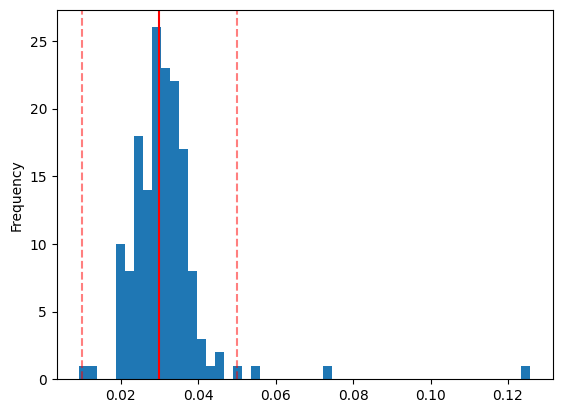

In [35]:
diff = probe_data.loc[:,'DIFF']
diff = diff.dropna()
ax = diff.plot.hist(bins= 50)

doc = 0.03
tol = 0.02
t_lims = [(doc-tol), (doc+tol)]
ax.axvline(x=doc, color = 'r')
for t_lim in t_lims: ax.axvline(x=t_lim, color='r', alpha=0.5, ls='--')
diff.describe()

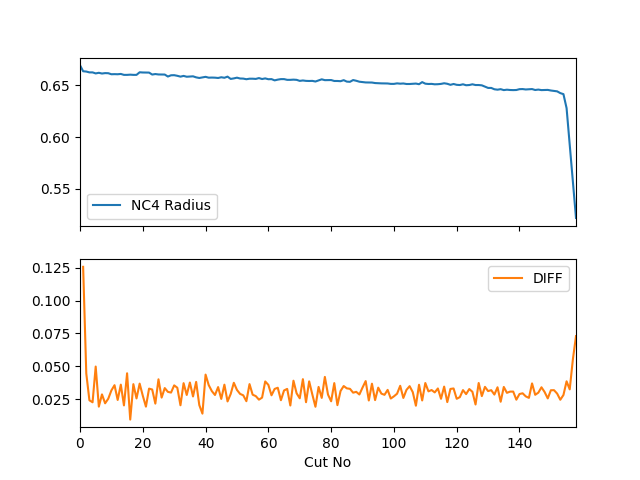

In [4]:
ax = probe_data.plot(y=['NC4 Radius', 'DIFF'],subplots=True, sharex=True, xlim=[0,158])

In [5]:
exp9 = resources.load('Test 9')
exp9

Test No: 9
Date: 2022-11-30
Data: ..\..\Testing\22_11_30_weartest_1000
No. Files: AE-158 NC4-159

In [6]:
feat_df = exp9.features
feat_df['Probe diff'] = probe_data['DIFF']
feat_df.head()

,RMS,Kurtosis,Amplitude,Skewness,Freq 10 kHz,Freq 35 kHz,Freq 134 kHz,Mean radius,Peak radius,Radius diff,Runout,Form error,Probe diff
0,1.891464,3.994032,13.023259,-0.011871,56.316367,68.038985,58.461305,0.664968,0.672558,-0.003375,0.013251,0.015911,NaN
1,1.347911,5.450587,10.642370,-0.140114,50.581221,59.484539,53.085125,0.664559,0.672041,-0.000409,0.012694,0.015116,0.125775
2,1.345826,5.448978,11.530952,-0.007557,49.526384,61.283588,51.947801,0.664087,0.671288,-0.000472,0.011380,0.014551,0.044525
3,1.282103,6.104586,13.500013,0.010431,49.633509,61.005323,52.037463,0.663362,0.670143,-0.000725,0.010906,0.014653,0.024050
4,1.285406,6.431532,13.946903,0.013657,49.253890,60.789605,52.052509,0.663254,0.669938,-0.000109,0.011009,0.014645,0.022550


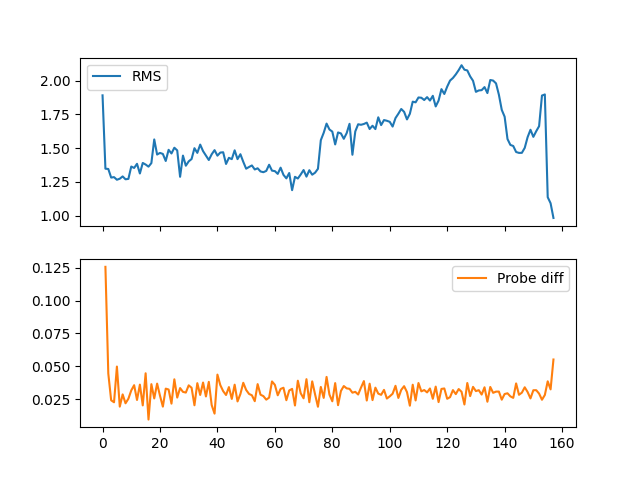

In [7]:
ax = feat_df.plot(y=['RMS', 'Probe diff'], subplots=True, sharex=True)

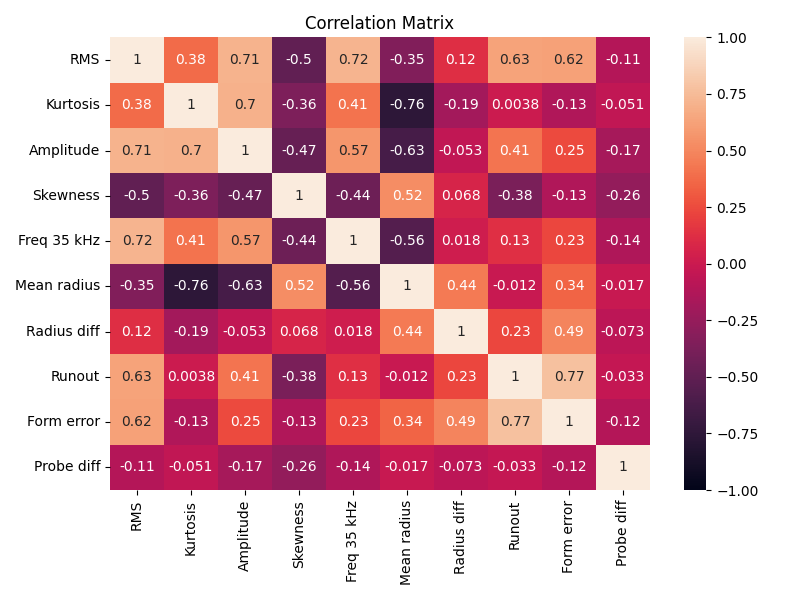

In [8]:
def corr_matrix(df: pd.DataFrame):
    cols = df.columns
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    sns.heatmap(df.corr(),
                ax=ax,
                annot=True,
                xticklabels=cols,
                yticklabels=cols,
                vmin=-1,
                vmax=1) \
        .set(title='Correlation Matrix')
    plt.tight_layout()
    plt.show()
    return df.corr()

corr_df = corr_matrix(feat_df.drop(columns=['Peak radius','Freq 10 kHz', 'Freq 134 kHz']))